## 3.1 CNN形成背景
    
    * LeCun(CNN之父)-Bengio-Hinton三巨頭
    * CNN善於 **圖形辨識**
    * LeCun如何回應神經網路沉寂又復興：複雜軟體、電腦計算能力、大量數據的進步。
    
    * 延伸閱讀：https://www.bloomberg.com/news/features/2018-05-17/apple-and-its-rivals-bet-their-futures-on-these-men-s-dreams


## 3.2 CNN 概念

    *圖形辨識首選
    例子：停車場車牌辨識、FB圖片辨識
    
    *CNN原理
    用不同"filter"，以區塊辨識不同特徵。

## 3.3 CNN運作方式

    * 兩種隱藏層
    1. convolutional layer
    2. pooling layer
    
    * 運作方式
    1. 製作filters，例如3*3。
    2. filter由權重組成，並與輸入值內積。
    3. 一格格移動，獲得與原矩陣相近大小的矩陣。
    
    * CNN隱藏層神經元並非fullly connected，而是只有filter範圍下
    * BUT：CNN有時候會增加維度？

## 3.4 Pooling層

    * Pooling層功能為簡化CNN的維度，最常見的為Max-pooling layer，在建立分區下，再取得最大值。
![max_pool](3_1.jpg)
    * 原則上可不斷重複convolutional、pooling層，但面臨運算量大難以學習。

## 3.5 CNN做手寫辨識

    * 手寫辨識範例
    - (1)問題、(2)化為函數、(3)準備資料
    - (4)架構神經網路
        C、P層交替三次，最終到Dense層
        3*3 filter並隨著層數後移增加
   ![CNN架構](3_2.jpg)
        

## 3.6 使用CNN做手寫辨識

### (1)初始準備

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### (2) 讀入數據

In [4]:
from keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### (2.1輸入格式整理)
彩色圖片具有RGB三個矩陣，但因為資料為灰階，僅有一個矩陣，因此Reshape時要指示Keras。

In [6]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [8]:
x_train[9487].shape

(28, 28, 1)

In [9]:
X = x_train[9487][:,:,0]

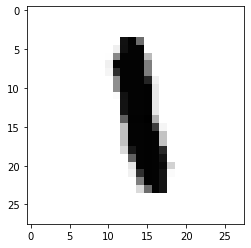

In [10]:
plt.imshow(X, cmap='Greys')

### (2.2) 輸出格式整理

In [11]:
from keras.utils import np_utils

In [12]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

## (3)打造CNN神經網路

    - 三次C、P層
    - filter大小為3*3，max-pooling以2*2為區塊
    - filter數目越來越多，做完convolution後，要拉平送到一般的Dense層，內有200個神經元。

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
#Flattern可以將向量拉平
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [14]:
model=Sequential()

#### C、P層設定

In [15]:
model.add(Conv2D(32,(3,3),padding='same', input_shape=(28,28,1)))
#filter數目、大小、是否維持一樣的矩陣大小
model.add(Activation('relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

#### 最終Dense層

In [22]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [23]:
model.add(Dense(10))
model.add(Activation('softmax'))

#### 組裝神經網路

In [24]:
model.compile(loss='mse', optimizer=SGD(lr=0.05),metrics=['accuracy'])

## (4.1)檢視神經網路

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [28]:
#conv2d_1 (Conv2D) ：320(filter內權重+filer偏值)*32個
(3*3+1)*32

320

## (4)訓練神經網路

In [29]:
model.fit(x_train, y_train, batch_size=100, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0843 - accuracy: 0.5311
Epoch 2/12
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0058 - accuracy: 0.9620
Epoch 3/12
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0037 - accuracy: 0.9755
Epoch 4/12
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0028 - accuracy: 0.9819
Epoch 5/12
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0023 - accuracy: 0.9855
Epoch 6/12
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0019 - accuracy: 0.9885
Epoch 7/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0016 - accuracy: 0.9906
Epoch 8/12
60000/60000 [==============================] - 225s 4ms/step - loss: 0.0014 - accuracy: 0.9918
Epoch 9/12
60000/60000 [==============================] - 229s 4ms/step - loss: 0.0012 - accuracy: 0.9934
Epoch 10/12
60000/60000 [=====================

## (5.1)結果測試

In [30]:
score =model.evaluate(x_test,y_test)

10000/10000 [==============================] - 20s 2ms/step


In [31]:
print('loss:', score[0])
print('acc:', score[1])

loss: 0.0019985510125206623
acc: 0.9872999787330627


## (5.2)儲存結果

In [32]:
model_json= model.to_json()
open('handwriting_model_cnn.json', 'w').write(model_json)
model.save_weights('handwriting_cnn_weights.h5')

## (5.3)欣賞成果

In [33]:
predict=model.predict_classes(x_test)

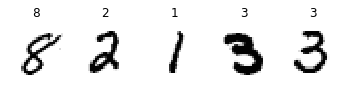

In [39]:
pick = np.random.randint(1,9999,5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis('off')

## (5.4)小結論

若發現學習結果正確率不理想時，可以重複學習。
但如果問題未能解決，便需要調整學習方法(optimizer)、激活函數或是將資料做常態化。